# Comparison of the results

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [360]:
fst = 'aqua'
snd = 'aquamarine'
trd = 'darksalmon'

## Loading the files

In [361]:
nn_reviews_baseline = pd.read_csv('results/baselines/nn_reviews_baseline.csv')
nn_news_baseline = pd.read_csv('results/baselines/nn_news_baseline.csv')
svm_reviews_baseline = pd.read_csv('results/baselines/svm_reviews_baseline.csv')
svm_news_baseline = pd.read_csv('results/baselines/svm_news_baseline.csv')
nn_reviews_augmented_baseline = pd.read_csv('results/baselines/nn_reviews_augmented_baseline.csv')
svm_reviews_augmented_baseline = pd.read_csv('results/baselines/svm_reviews_augmented_baseline.csv')

lstm_reviews_base_model = pd.read_csv('results/lstm/reviews/base_model.csv')
lstm_reviews_base_model_dropout = pd.read_csv('results/lstm/reviews/base_model_dropout.csv')
lstm_reviews_bigger_parameters = pd.read_csv('results/lstm/reviews/bigger_parameters.csv')
lstm_reviews_best_parameters = pd.read_csv('results/lstm/reviews/best_parameters.csv')
lstm_reviews_augmented_best_parameters = pd.read_csv('results/lstm/reviews/augmented_best_parameters.csv')

lstm_news_base_model = pd.read_csv('results/lstm/news/base_model.csv')
lstm_news_best_parameters = pd.read_csv('results/lstm/news/best_parameters.csv')
lstm_news_bigger_parameters = pd.read_csv('results/lstm/news/bigger_parameters.csv')

bert_reviews = pd.read_csv('results/bert/reviews_results.csv')
bert_news = pd.read_csv('results/bert/news_results.csv')

In [362]:
bert_news

,Unnamed: 0,1,2,3,4,accuracy,macro avg,weighted avg,train_time,test_time
0,precision,0.914761,0.978307,0.909859,0.867727,0.916974,0.917664,0.917664,4075,169
1,recall,0.926316,0.973158,0.850000,0.918421,0.916974,0.916974,0.916974,4075,169
2,f1-score,0.920502,0.975726,0.878912,0.892355,0.916974,0.916874,0.916874,4075,169
3,support,1900.000000,1900.000000,1900.000000,1900.000000,0.916974,7600.000000,7600.000000,4075,169


In [363]:
plt.style.use('seaborn-v0_8-pastel')

In [364]:
nn_reviews_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)
svm_reviews_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)

nn_news_baseline.rename(columns={"Unnamed: 0": "Metric", "1": "World", "2": "Sports", "3": "Business", "4": "Sci/Tech"},
                        inplace=True)
svm_news_baseline.rename(
    columns={"Unnamed: 0": "Metric", "1": "World", "2": "Sports", "3": "Business", "4": "Sci/Tech"}, inplace=True)

nn_reviews_augmented_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)
svm_reviews_augmented_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)

lstm_reviews_best_parameters.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
lstm_reviews_bigger_parameters.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
lstm_reviews_base_model.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
lstm_reviews_augmented_best_parameters.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
lstm_reviews_base_model_dropout.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)

lstm_news_base_model.rename(
    columns={"Unnamed: 0": "Metric", "0": "World", "1": "Sports", "2": "Business", "3": "Sci/Tech"}, inplace=True)
lstm_news_best_parameters.rename(
    columns={"Unnamed: 0": "Metric", "0": "World", "1": "Sports", "2": "Business", "3": "Sci/Tech"}, inplace=True)
lstm_news_bigger_parameters.rename(
    columns={"Unnamed: 0": "Metric", "0": "World", "1": "Sports", "2": "Business", "3": "Sci/Tech"}, inplace=True)

bert_reviews.rename(columns={"Unnamed: 0": "Metric", "0": "negative", "1": "neutral", "2":"positive"}, inplace=True)
bert_news.rename(
    columns={"Unnamed: 0": "Metric", "1": "World", "2": "Sports", "3": "Business", "4": "Sci/Tech"}, inplace=True)

In [365]:
nn_reviews_baseline.set_index('Metric', inplace=True)
svm_reviews_baseline.set_index('Metric', inplace=True)
nn_news_baseline.set_index('Metric', inplace=True)
svm_news_baseline.set_index('Metric', inplace=True)

nn_reviews_augmented_baseline.set_index('Metric', inplace=True)
svm_reviews_augmented_baseline.set_index('Metric', inplace=True)

lstm_reviews_base_model_dropout.set_index('Metric', inplace=True)
lstm_reviews_best_parameters.set_index('Metric', inplace=True)
lstm_reviews_base_model.set_index('Metric', inplace=True)
lstm_reviews_bigger_parameters.set_index('Metric', inplace=True)
lstm_reviews_augmented_best_parameters.set_index('Metric', inplace=True)

lstm_news_base_model.set_index('Metric', inplace=True)
lstm_news_bigger_parameters.set_index('Metric', inplace=True)
lstm_news_best_parameters.set_index('Metric', inplace=True)

bert_reviews.set_index('Metric', inplace=True)
bert_news.set_index('Metric', inplace=True)

### Creating Runtime Dataframe

In [366]:
runtimes = pd.DataFrame.from_dict({
    "train": [nn_reviews_baseline.train_time[0],
              svm_reviews_baseline.train_time[0],
              nn_reviews_augmented_baseline.train_time[0],
              svm_reviews_augmented_baseline.train_time[0],
              nn_news_baseline.train_time[0],
              svm_news_baseline.train_time[0],
              lstm_reviews_base_model_dropout.train_time[0],
              lstm_reviews_best_parameters.train_time[0],
              lstm_reviews_base_model.train_time[0],
              lstm_reviews_bigger_parameters.train_time[0],
              lstm_reviews_augmented_best_parameters.train_time[0],
              lstm_news_base_model.train_time[0],
              lstm_news_bigger_parameters.train_time[0],
              lstm_news_best_parameters.train_time[0],
              bert_reviews.train_time[0],
              bert_news.train_time[0]],
    "test": [nn_reviews_baseline.test_time[0],
             svm_reviews_baseline.test_time[0],
             nn_reviews_augmented_baseline.test_time[0],
             svm_reviews_augmented_baseline.test_time[0],
             nn_news_baseline.test_time[0],
             svm_news_baseline.test_time[0],
             lstm_reviews_base_model_dropout.test_time[0],
             lstm_reviews_best_parameters.test_time[0],
             lstm_reviews_base_model.test_time[0],
             lstm_reviews_bigger_parameters.test_time[0],
             lstm_reviews_augmented_best_parameters.test_time[0],
             lstm_news_base_model.test_time[0],
             lstm_news_bigger_parameters.test_time[0],
             lstm_news_best_parameters.test_time[0],
             bert_reviews.test_time[0],
             bert_news.test_time[0]]
}
)
runtimes.index = ["nn_reviews", "svm_reviews", "nn_reviews_augmented",
                  "svm_reviews_augmented", "nn_news", "svm_news",
                  "lstm_reviews_base_model_dropout", "lstm_reviews_best_parameters",
                  "lstm_reviews_base_model", "lstm_reviews_bigger_parameters",
                  "lstm_reviews_augmented_best_parameters", "lstm_news_base_model",
                  "lstm_news_bigger_parameters", "lstm_news_best_parameters",
                  "bert_reviews", "bert_news"]

feature_extraction_times = pd.DataFrame.from_dict(
    {"feature_extraction": [nn_reviews_baseline.feature_extraction_time[0],
                            nn_reviews_baseline.feature_extraction_time[0],
                            nn_reviews_augmented_baseline.feature_extraction_time[0],
                            nn_reviews_augmented_baseline.feature_extraction_time[0],
                            nn_news_baseline.feature_extraction_time[0],
                            nn_news_baseline.feature_extraction_time[0]]})
feature_extraction_times.index = ["nn_reviews", "svm_reviews", "nn_reviews_augmented",
                                  "svm_reviews_augmented", "nn_news", "svm_news"]

## Combining non-class metrics into one DF

In [367]:
overall_metrics = pd.DataFrame.from_dict({
    "accuracy": [nn_reviews_baseline.accuracy[0],
                 svm_reviews_baseline.accuracy[0],
                 nn_reviews_augmented_baseline.accuracy[0],
                 svm_reviews_augmented_baseline.accuracy[0],
                 nn_news_baseline.accuracy[0],
                 svm_news_baseline.accuracy[0],
                 lstm_reviews_base_model_dropout.accuracy[0],
                 lstm_reviews_best_parameters.accuracy[0],
                 lstm_reviews_base_model.accuracy[0],
                 lstm_reviews_bigger_parameters.accuracy[0],
                 lstm_reviews_augmented_best_parameters.accuracy[0],
                 lstm_news_base_model.accuracy[0],
                 lstm_news_bigger_parameters.accuracy[0],
                 lstm_news_best_parameters.accuracy[0],
                 bert_reviews.accuracy[0],
                 bert_news.accuracy[0]],
    "macro avg": [nn_reviews_baseline['macro avg'][0],
                  svm_reviews_baseline['macro avg'][0],
                  nn_reviews_augmented_baseline['macro avg'][0],
                  svm_reviews_augmented_baseline['macro avg'][0],
                  nn_news_baseline['macro avg'][0],
                  svm_news_baseline['macro avg'][0],
                  lstm_reviews_base_model_dropout['macro avg'][0],
                  lstm_reviews_best_parameters['macro avg'][0],
                  lstm_reviews_base_model['macro avg'][0],
                  lstm_reviews_bigger_parameters['macro avg'][0],
                  lstm_reviews_augmented_best_parameters['macro avg'][0],
                  lstm_news_base_model['macro avg'][0],
                  lstm_news_bigger_parameters['macro avg'][0],
                  lstm_news_best_parameters['macro avg'][0],
                  bert_reviews['macro avg'][0],
                  bert_news['macro avg'][0]],
    "weighted avg": [nn_reviews_baseline['weighted avg'][0],
                     svm_reviews_baseline['weighted avg'][0],
                     nn_reviews_augmented_baseline['weighted avg'][0],
                     svm_reviews_augmented_baseline['weighted avg'][0],
                     nn_news_baseline['weighted avg'][0],
                     svm_news_baseline['weighted avg'][0],
                     lstm_reviews_base_model_dropout['weighted avg'][0],
                     lstm_reviews_best_parameters['weighted avg'][0],
                     lstm_reviews_base_model['weighted avg'][0],
                     lstm_reviews_bigger_parameters['weighted avg'][0],
                     lstm_reviews_augmented_best_parameters['weighted avg'][0],
                     lstm_news_base_model['weighted avg'][0],
                     lstm_news_bigger_parameters['weighted avg'][0],
                     lstm_news_best_parameters['weighted avg'][0],
                     bert_reviews['weighted avg'][0],
                     bert_news['weighted avg'][0]]
})
overall_metrics.index = ["nn_reviews", "svm_reviews", "nn_reviews_augmented",
                  "svm_reviews_augmented", "nn_news", "svm_news",
                  "lstm_reviews_base_model_dropout", "lstm_reviews_best_parameters",
                  "lstm_reviews_base_model", "lstm_reviews_bigger_parameters",
                  "lstm_reviews_augmented_best_parameters", "lstm_news_base_model",
                  "lstm_news_bigger_parameters", "lstm_news_best_parameters",
                  "bert_reviews", "bert_news"]


In [368]:
overall_metrics_reviews = overall_metrics.loc[overall_metrics.index.str.contains('reviews')]
overall_metrics_news = overall_metrics.loc[overall_metrics.index.str.contains('news')]

Dropping time and overall columns from original datasets

In [369]:
nn_reviews_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
nn_news_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
nn_reviews_augmented_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time', 'accuracy', 'macro avg', 'weighted avg', 'augmentation_time'], inplace=True)

svm_reviews_baseline.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
svm_news_baseline.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
svm_reviews_augmented_baseline.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

lstm_reviews_base_model.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_reviews_best_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_reviews_base_model_dropout.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_reviews_bigger_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_reviews_augmented_best_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

lstm_news_base_model.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_news_bigger_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
lstm_news_best_parameters.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

bert_reviews.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)
bert_news.drop(columns=['train_time', 'test_time', 'accuracy', 'macro avg', 'weighted avg'], inplace=True)

In [370]:
fst_patch = Patch(color=fst, label='Baseline')
snd_patch = Patch(color=snd, label='LSTM')
trd_patch = Patch(color=trd, label='BERT')

## Overall Metrics comparison (Accuracy micro, macro and weighted avg)

### Reviews Dataset

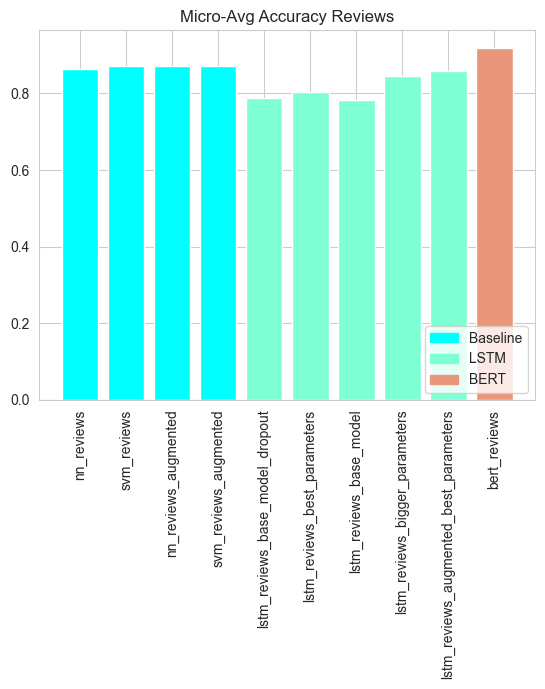

In [371]:
plt.bar(overall_metrics_reviews.index, overall_metrics_reviews.accuracy,
        color=[fst for x in range(4)]+ [snd for x in range(5)] + [trd])
plt.xticks(rotation=90)

plt.title('Micro-Avg Accuracy Reviews')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

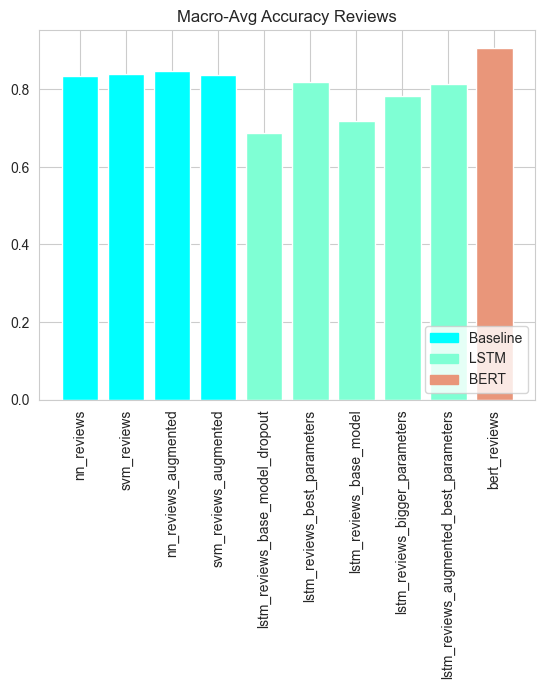

In [372]:
plt.bar(overall_metrics_reviews.index, overall_metrics_reviews['macro avg'],
        color=[fst for x in range(4)]+ [snd for x in range(5)] + [trd])
plt.xticks(rotation=90)

plt.title('Macro-Avg Accuracy Reviews')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

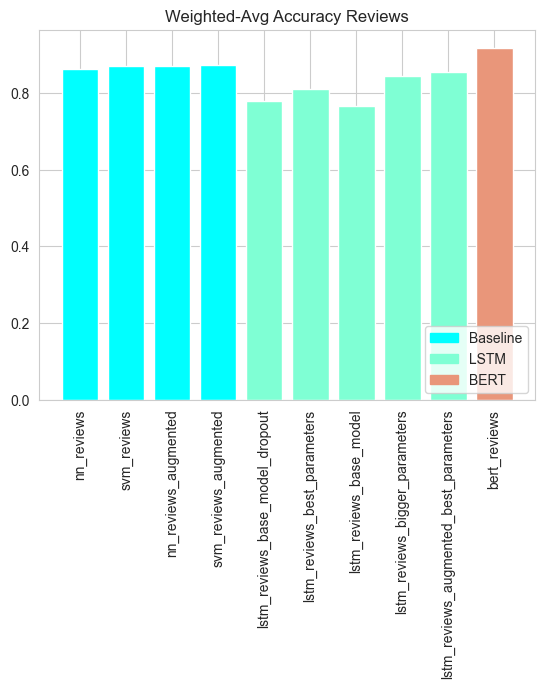

In [373]:
plt.bar(overall_metrics_reviews.index, overall_metrics_reviews['weighted avg'],
        color=[fst for x in range(4)]+ [snd for x in range(5)] + [trd])
plt.xticks(rotation=90)

plt.title('Weighted-Avg Accuracy Reviews')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

### News Dataset

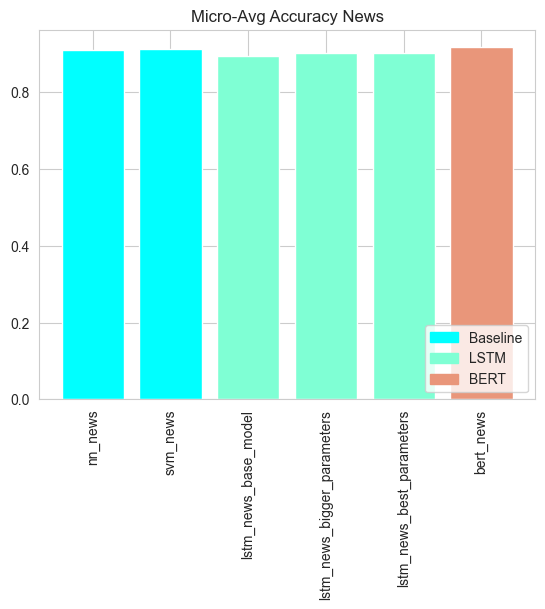

In [374]:
plt.bar(overall_metrics_news.index, overall_metrics_news.accuracy,
        color=[fst for x in range(2)]+ [snd for x in range(3)] + [trd])
plt.xticks(rotation=90)

plt.title('Micro-Avg Accuracy News')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

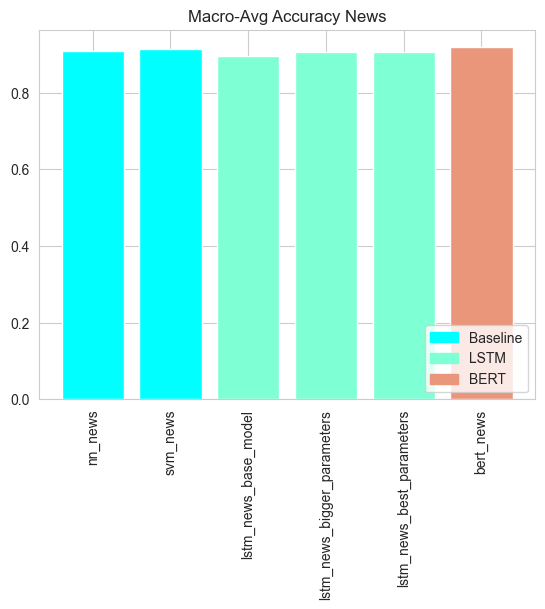

In [375]:
plt.bar(overall_metrics_news.index, overall_metrics_news['macro avg'],
        color=[fst for x in range(2)]+ [snd for x in range(3)] + [trd])
plt.xticks(rotation=90)

plt.title('Macro-Avg Accuracy News')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

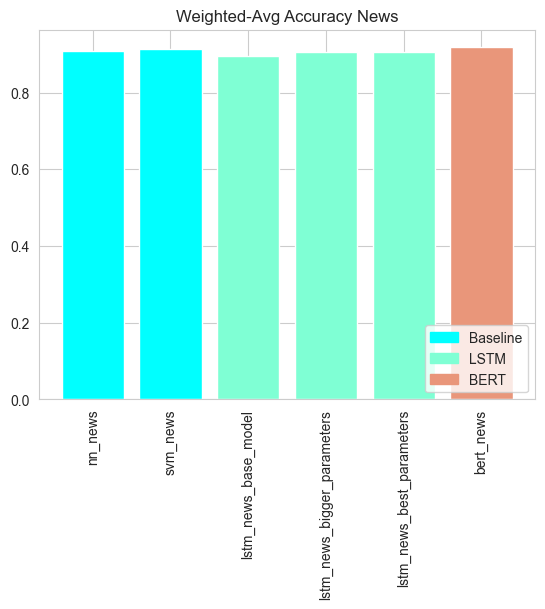

In [376]:
plt.bar(overall_metrics_news.index, overall_metrics_news['weighted avg'],
        color=[fst for x in range(2)]+ [snd for x in range(3)] + [trd])
plt.xticks(rotation=90)

plt.title('Weighted-Avg Accuracy News')
plt.legend(handles=[fst_patch,snd_patch,trd_patch], loc='lower right')
plt.show()

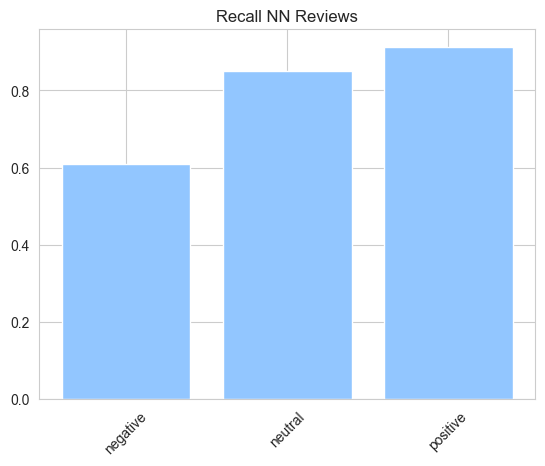

In [377]:
plt.bar(nn_reviews_baseline.columns, nn_reviews_baseline.loc['recall', :])
plt.xticks(rotation=45)
plt.title("Recall NN Reviews")
plt.show()

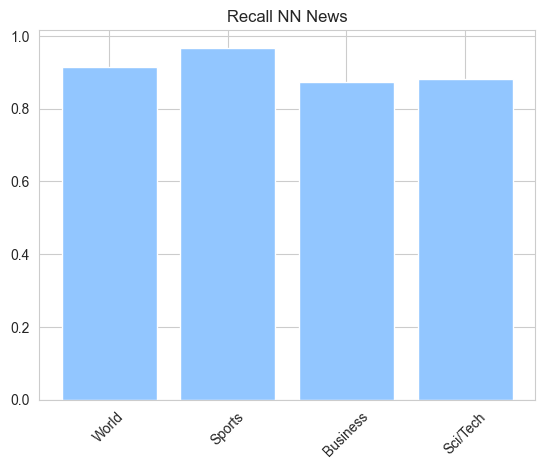

In [378]:
plt.bar(nn_news_baseline.columns, nn_news_baseline.loc['recall', :])
plt.xticks(rotation=45)
plt.title("Recall NN News")
plt.show()

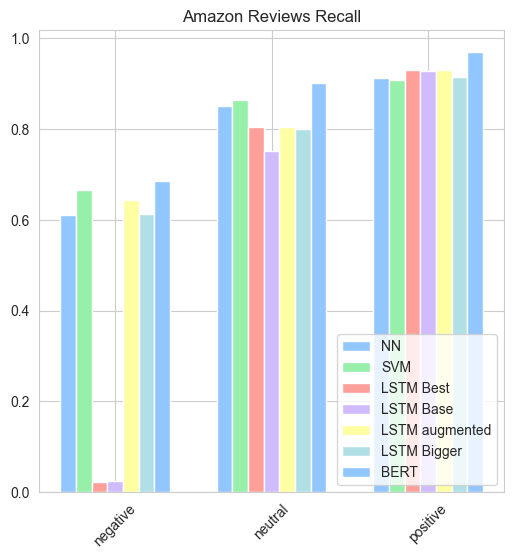

In [379]:
x = np.arange(nn_reviews_baseline.shape[1])
width = 0.1
plt.figure(figsize=(6,6))

# plot data in grouped manner of bar type
plt.bar(x - 3*width, nn_reviews_baseline.loc['recall', :], width)
plt.bar(x - 2*width, svm_reviews_baseline.loc['recall', :], width)
plt.bar(x -width, lstm_reviews_best_parameters.loc['recall', :], width)
plt.bar(x , lstm_reviews_base_model.loc['recall', :], width)
plt.bar(x + width, lstm_reviews_augmented_best_parameters.loc['recall', :], width)
plt.bar(x + 2*width, lstm_reviews_bigger_parameters.loc['recall', :], width)
plt.bar(x + 3*width, bert_reviews.loc['recall', :], width)

plt.xticks(x, nn_reviews_baseline.columns, rotation=45)
plt.title("Amazon Reviews Recall")
plt.legend(['NN', 'SVM', 'LSTM Best', 'LSTM Base', 'LSTM augmented', 'LSTM Bigger',  'BERT'],
           loc='lower right')
plt.show()

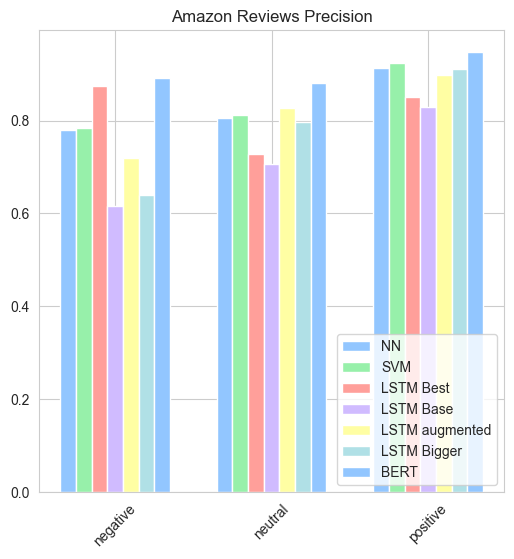

In [380]:
x = np.arange(nn_reviews_baseline.shape[1])
width = 0.1
plt.figure(figsize=(6,6))

# plot data in grouped manner of bar type
plt.bar(x - 3*width, nn_reviews_baseline.loc['precision', :], width)
plt.bar(x - 2*width, svm_reviews_baseline.loc['precision', :], width)
plt.bar(x -width, lstm_reviews_best_parameters.loc['precision', :], width)
plt.bar(x , lstm_reviews_base_model.loc['precision', :], width)
plt.bar(x + width, lstm_reviews_augmented_best_parameters.loc['precision', :], width)
plt.bar(x + 2*width, lstm_reviews_bigger_parameters.loc['precision', :], width)
plt.bar(x + 3*width, bert_reviews.loc['precision', :], width)

plt.xticks(x, nn_reviews_baseline.columns, rotation=45)
plt.title("Amazon Reviews Precision")
plt.legend(['NN', 'SVM', 'LSTM Best', 'LSTM Base', 'LSTM augmented', 'LSTM Bigger',  'BERT'],
           loc='lower right')
plt.show()

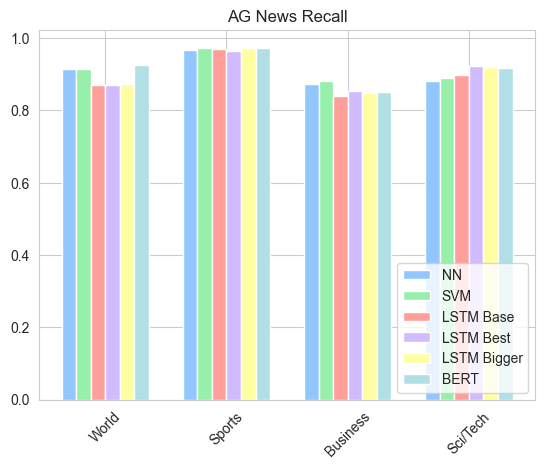

In [381]:
x = np.arange(nn_news_baseline.shape[1])
width = 0.12

# plot data in grouped manner of bar type
plt.bar(x - 2.5*width, nn_news_baseline.loc['recall', :], width)
plt.bar(x - 1.5*width, svm_news_baseline.loc['recall', :], width)
plt.bar(x - 0.5*width, lstm_news_base_model.loc['recall', :], width)
plt.bar(x + 0.5*width, lstm_news_best_parameters.loc['recall', :], width)
plt.bar(x + 1.5*width, lstm_news_bigger_parameters.loc['recall', :], width)
plt.bar(x + 2.5*width, bert_news.loc['recall', :], width)
plt.xticks(x, nn_news_baseline.columns, rotation=45)
plt.title("AG News Recall")
plt.legend(['NN', 'SVM', 'LSTM Base', 'LSTM Best', 'LSTM Bigger',  'BERT'],
           loc='lower right')
plt.show()

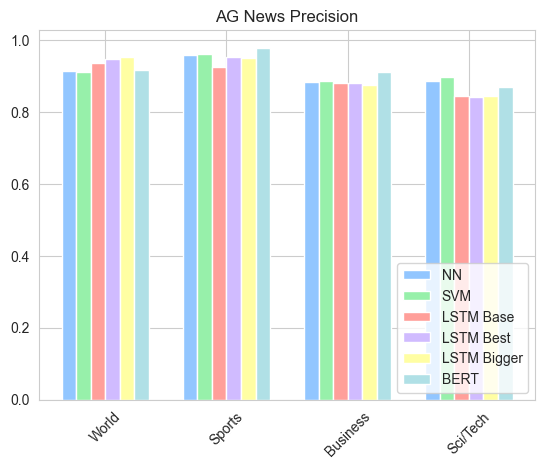

In [382]:
x = np.arange(nn_news_baseline.shape[1])
width = 0.12

# plot data in grouped manner of bar type
plt.bar(x - 2.5*width, nn_news_baseline.loc['precision', :], width)
plt.bar(x - 1.5*width, svm_news_baseline.loc['precision', :], width)
plt.bar(x - 0.5*width, lstm_news_base_model.loc['precision', :], width)
plt.bar(x + 0.5*width, lstm_news_best_parameters.loc['precision', :], width)
plt.bar(x + 1.5*width, lstm_news_bigger_parameters.loc['precision', :], width)
plt.bar(x + 2.5*width, bert_news.loc['precision', :], width)
plt.xticks(x, nn_news_baseline.columns, rotation=45)
plt.title("AG News Precision")
plt.legend(['NN', 'SVM', 'LSTM Base', 'LSTM Best', 'LSTM Bigger',  'BERT'],
           loc='lower right')
plt.show()

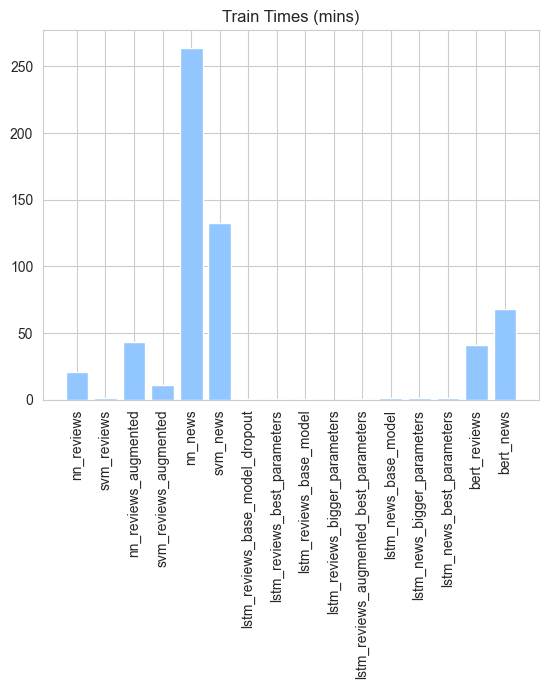

In [408]:

x = runtimes.index
# plot bars in stack manner
plt.bar(x, runtimes.train / 60)
#plt.bar(x, runtimes.test, bottom=runtimes.train, color='b')
#plt.yscale("log")
plt.title("Train Times (mins)")
plt.xticks(rotation=90)
plt.show()

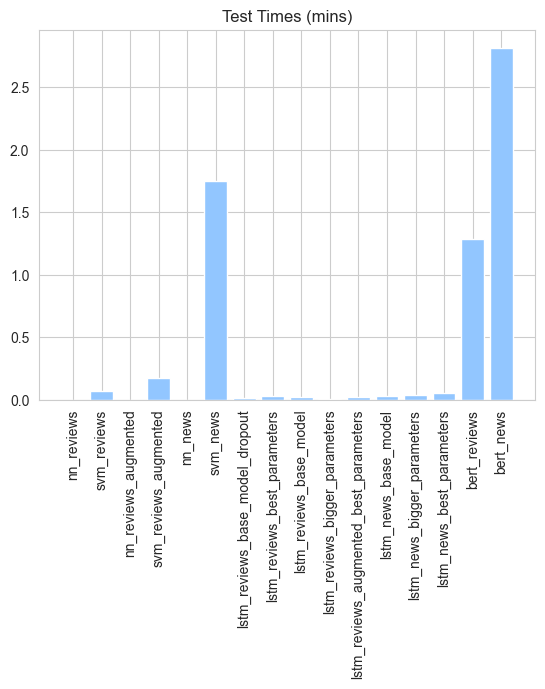

In [384]:
x = runtimes.index
plt.bar(x, runtimes.test / 60)
plt.title("Test Times (mins)")

plt.xticks(rotation=90)
plt.show()

In [385]:
feature_extraction_times

,feature_extraction
nn_reviews,3.092748
svm_reviews,3.092748
nn_reviews_augmented,2.075799
svm_reviews_augmented,2.075799
nn_news,24.561729
svm_news,24.561729


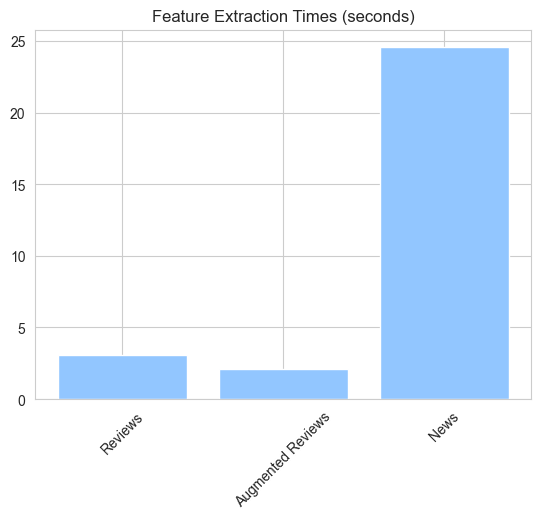

In [386]:
x = ['Reviews', 'Augmented Reviews', 'News']
plt.bar(x, feature_extraction_times.feature_extraction[['nn_reviews', 'nn_reviews_augmented', 'nn_news']])
plt.title("Feature Extraction Times (seconds)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Radoslav Gajanin\AppData\Local\Temp\ipykernel_19508\4075063317.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 10 ** 3))


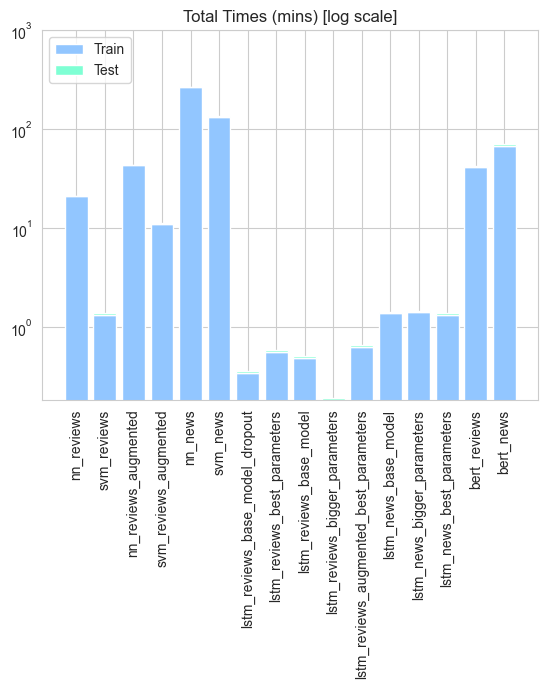

In [387]:
x = runtimes.index
# plot bars in stack manner
plt.bar(x, runtimes.train / 60)
plt.bar(x, runtimes.test / 60, bottom=runtimes.train / 60, color='aquamarine')
plt.yscale("log")
plt.ylim((0, 10 ** 3))
plt.xticks(rotation=90)
plt.title("Total Times (mins) [log scale]")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## LSTM

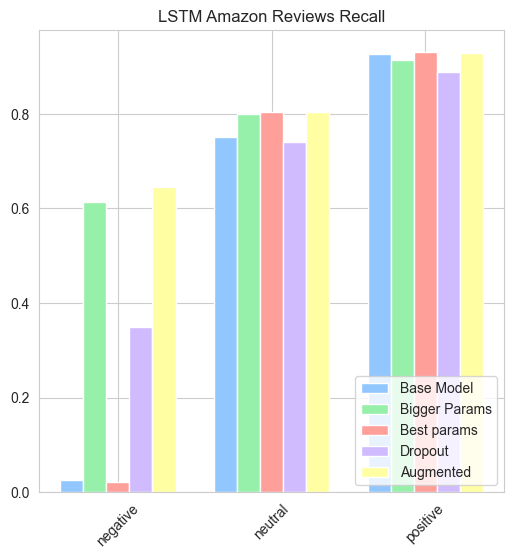

In [388]:
x = np.arange(lstm_reviews_base_model_dropout.shape[1])
width = 0.15
plt.figure(figsize=(6,6))

# plot data in grouped manner of bar type
plt.bar(x - 2*width, lstm_reviews_base_model.loc['recall', :], width)
plt.bar(x - width, lstm_reviews_bigger_parameters.loc['recall', :], width)
plt.bar(x , lstm_reviews_best_parameters.loc['recall', :], width)
plt.bar(x + width, lstm_reviews_base_model_dropout.loc['recall', :], width)
plt.bar(x + 2*width, lstm_reviews_augmented_best_parameters.loc['recall', :], width)

plt.xticks(x, lstm_reviews_base_model_dropout.columns, rotation=45)
plt.title("LSTM Amazon Reviews Recall")
plt.legend(['Base Model', 'Bigger Params', 'Best params', 'Dropout', 'Augmented'], loc='lower right')
plt.show()

In [389]:
lstm_news_base_model

,World,Sports,Business,Sci/Tech
Metric,,,,
precision,0.934955,0.924812,0.879956,0.844631
recall,0.870000,0.971053,0.841053,0.898421
f1-score,0.901309,0.947368,0.860065,0.870696
support,1900.000000,1900.000000,1900.000000,1900.000000


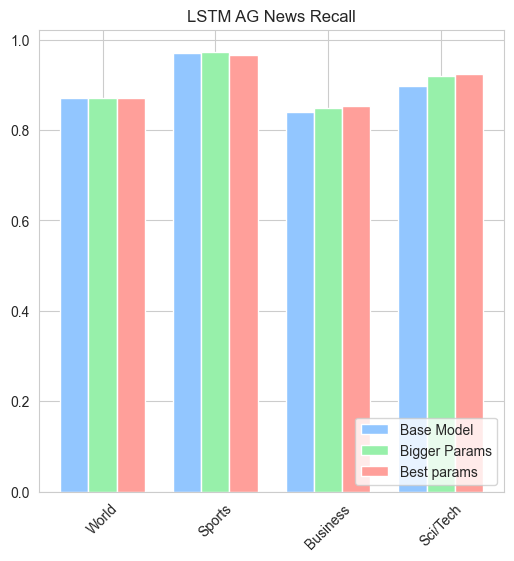

In [390]:
x = np.arange(lstm_news_best_parameters.shape[1])
width = 0.25
plt.figure(figsize=(6,6))

# plot data in grouped manner of bar type
plt.bar(x - width, lstm_news_base_model.loc['recall', :], width)
plt.bar(x , lstm_news_bigger_parameters.loc['recall', :], width)
plt.bar(x + width, lstm_news_best_parameters.loc['recall', :], width)

plt.xticks(x, lstm_news_best_parameters.columns, rotation=45)
plt.title("LSTM AG News Recall")
plt.legend(['Base Model', 'Bigger Params', 'Best params'], loc='lower right')
plt.show()

In [391]:
print(overall_metrics_reviews.to_latex(float_format="%.2f", caption="Reviews Dataset Overall Metrics"))

\begin{table}
\centering
\caption{Reviews Dataset Overall Metrics}
\begin{tabular}{lrrr}
\toprule
{} &  accuracy &  macro avg &  weighted avg \\
\midrule
nn\_reviews                             &      0.86 &       0.83 &          0.86 \\
svm\_reviews                            &      0.87 &       0.84 &          0.87 \\
nn\_reviews\_augmented                   &      0.87 &       0.85 &          0.87 \\
svm\_reviews\_augmented                  &      0.87 &       0.84 &          0.87 \\
lstm\_reviews\_base\_model\_dropout        &      0.79 &       0.69 &          0.78 \\
lstm\_reviews\_best\_parameters           &      0.80 &       0.82 &          0.81 \\
lstm\_reviews\_base\_model                &      0.78 &       0.72 &          0.77 \\
lstm\_reviews\_bigger\_parameters         &      0.85 &       0.78 &          0.84 \\
lstm\_reviews\_augmented\_best\_parameters &      0.86 &       0.81 &          0.86 \\
bert\_reviews                           &      0.92 &       0.91 &          

C:\Users\Radoslav Gajanin\AppData\Local\Temp\ipykernel_19508\350954416.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(overall_metrics_reviews.to_latex(float_format="%.2f", caption="Reviews Dataset Overall Metrics"))


In [392]:
print(overall_metrics_news.to_latex(float_format="%.2f", caption="News Dataset Overall Metrics"))

\begin{table}
\centering
\caption{News Dataset Overall Metrics}
\begin{tabular}{lrrr}
\toprule
{} &  accuracy &  macro avg &  weighted avg \\
\midrule
nn\_news                     &      0.91 &       0.91 &          0.91 \\
svm\_news                    &      0.91 &       0.91 &          0.91 \\
lstm\_news\_base\_model        &      0.90 &       0.90 &          0.90 \\
lstm\_news\_bigger\_parameters &      0.90 &       0.91 &          0.91 \\
lstm\_news\_best\_parameters   &      0.90 &       0.90 &          0.90 \\
bert\_news                   &      0.92 &       0.92 &          0.92 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\Radoslav Gajanin\AppData\Local\Temp\ipykernel_19508\2042286759.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(overall_metrics_news.to_latex(float_format="%.2f", caption="News Dataset Overall Metrics"))


### Class wise metrics latex tables export

#### Reviews Dataset

In [393]:
reviews_recall = pd.DataFrame.from_dict({
    "nn_baseline": nn_reviews_baseline.loc['recall'],
    "svm_baseline": svm_reviews_baseline.loc['recall'],
    "nn_augmented_baseline": nn_reviews_augmented_baseline.loc['recall'],
    "svm_augmented_baseline": svm_reviews_augmented_baseline.loc['recall'],
    "lstm_base_model": lstm_reviews_base_model.loc['recall'],
    "lstm_base_model_dropout": lstm_reviews_base_model_dropout.loc['recall'],
    "lstm_best_params": lstm_reviews_best_parameters.loc['recall'],
    "lstm_bigger_params_model": lstm_reviews_bigger_parameters.loc['recall'],
    "lstm_augmented_model": lstm_reviews_augmented_best_parameters.loc['recall'],
    "bert_model" : bert_reviews.loc['recall']
}).T

reviews_recall

,negative,neutral,positive
nn_baseline,0.609524,0.850962,0.912336
svm_baseline,0.666667,0.863782,0.908136
nn_augmented_baseline,0.612698,0.864583,0.918110
svm_augmented_baseline,0.673016,0.864583,0.909186
lstm_base_model,0.025397,0.750801,0.927034
lstm_base_model_dropout,0.349206,0.740385,0.889239
lstm_best_params,0.022222,0.804487,0.930709
lstm_bigger_params_model,0.612698,0.799679,0.913911
lstm_augmented_model,0.644444,0.803686,0.929134
bert_model,0.685714,0.900561,0.969506


In [394]:
print(reviews_recall.to_latex(float_format="%.2f", caption="Reviews Recall per class", label="tab:reviews_recall"))

\begin{table}
\centering
\caption{Reviews Recall per class}
\label{tab:reviews_recall}
\begin{tabular}{lrrr}
\toprule
{} &  negative &  neutral &  positive \\
\midrule
nn\_baseline              &      0.61 &     0.85 &      0.91 \\
svm\_baseline             &      0.67 &     0.86 &      0.91 \\
nn\_augmented\_baseline    &      0.61 &     0.86 &      0.92 \\
svm\_augmented\_baseline   &      0.67 &     0.86 &      0.91 \\
lstm\_base\_model          &      0.03 &     0.75 &      0.93 \\
lstm\_base\_model\_dropout  &      0.35 &     0.74 &      0.89 \\
lstm\_best\_params         &      0.02 &     0.80 &      0.93 \\
lstm\_bigger\_params\_model &      0.61 &     0.80 &      0.91 \\
lstm\_augmented\_model     &      0.64 &     0.80 &      0.93 \\
bert\_model               &      0.69 &     0.90 &      0.97 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\Radoslav Gajanin\AppData\Local\Temp\ipykernel_19508\627872041.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(reviews_recall.to_latex(float_format="%.2f", caption="Reviews Recall per class", label="tab:reviews_recall"))


In [395]:
reviews_precision = pd.DataFrame.from_dict({
    "nn_baseline": nn_reviews_baseline.loc['precision'],
    "svm_baseline": svm_reviews_baseline.loc['precision'],
    "nn_augmented_baseline": nn_reviews_augmented_baseline.loc['precision'],
    "svm_augmented_baseline": svm_reviews_augmented_baseline.loc['precision'],
    "lstm_base_model": lstm_reviews_base_model.loc['precision'],
    "lstm_base_model_dropout": lstm_reviews_base_model_dropout.loc['precision'],
    "lstm_best_params": lstm_reviews_best_parameters.loc['precision'],
    "lstm_bigger_params_model": lstm_reviews_bigger_parameters.loc['precision'],
    "lstm_augmented_model": lstm_reviews_augmented_best_parameters.loc['precision'],
    "bert_model" : bert_reviews.loc['precision']
}).T

reviews_precision

,negative,neutral,positive
nn_baseline,0.780488,0.805155,0.913295
svm_baseline,0.783582,0.812359,0.923652
nn_augmented_baseline,0.810924,0.811889,0.920042
svm_augmented_baseline,0.768116,0.815571,0.926699
lstm_base_model,0.615385,0.706637,0.829497
lstm_base_model_dropout,0.476190,0.725844,0.862525
lstm_best_params,0.875000,0.728592,0.851585
lstm_bigger_params_model,0.639073,0.796488,0.910089
lstm_augmented_model,0.719858,0.826194,0.897566
bert_model,0.892562,0.880094,0.947585


In [396]:
print(reviews_precision.to_latex(float_format="%.2f", caption="Reviews Precision per class", label="tab:reviews_prec"))

\begin{table}
\centering
\caption{Reviews Precision per class}
\label{tab:reviews_prec}
\begin{tabular}{lrrr}
\toprule
{} &  negative &  neutral &  positive \\
\midrule
nn\_baseline              &      0.78 &     0.81 &      0.91 \\
svm\_baseline             &      0.78 &     0.81 &      0.92 \\
nn\_augmented\_baseline    &      0.81 &     0.81 &      0.92 \\
svm\_augmented\_baseline   &      0.77 &     0.82 &      0.93 \\
lstm\_base\_model          &      0.62 &     0.71 &      0.83 \\
lstm\_base\_model\_dropout  &      0.48 &     0.73 &      0.86 \\
lstm\_best\_params         &      0.88 &     0.73 &      0.85 \\
lstm\_bigger\_params\_model &      0.64 &     0.80 &      0.91 \\
lstm\_augmented\_model     &      0.72 &     0.83 &      0.90 \\
bert\_model               &      0.89 &     0.88 &      0.95 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\Radoslav Gajanin\AppData\Local\Temp\ipykernel_19508\3901291816.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(reviews_precision.to_latex(float_format="%.2f", caption="Reviews Precision per class", label="tab:reviews_prec"))


#### News Dataset

In [403]:
runtimes.iloc[ 10:,:]

,train,test
lstm_reviews_augmented_best_parameters,38.085537,1.235642
lstm_news_base_model,83.513696,1.598917
lstm_news_bigger_parameters,84.700018,2.329258
lstm_news_best_parameters,80.187830,3.176791
bert_reviews,2474.000000,77.000000
bert_news,4075.000000,169.000000


In [397]:
news_recall = pd.DataFrame.from_dict({
    "nn_baseline": nn_news_baseline.loc['recall'],
    "svm_baseline": svm_news_baseline.loc['recall'],
    "lstm_base_model": lstm_news_base_model.loc['recall'],
    "lstm_best_params": lstm_news_best_parameters.loc['recall'],
    "lstm_bigger_params_model": lstm_news_bigger_parameters.loc['recall'],
    "bert_model" : bert_news.loc['recall']
}).T

news_recall

,World,Sports,Business,Sci/Tech
nn_baseline,0.915789,0.967895,0.872632,0.881053
svm_baseline,0.914211,0.972105,0.880526,0.888421
lstm_base_model,0.870000,0.971053,0.841053,0.898421
lstm_best_params,0.870000,0.965263,0.853158,0.923158
lstm_bigger_params_model,0.872105,0.973684,0.848947,0.919474
bert_model,0.926316,0.973158,0.850000,0.918421


In [398]:
print(news_recall.to_latex(float_format="%.2f", caption="News Recall per class", label="tab:news_recall"))

\begin{table}
\centering
\caption{News Recall per class}
\label{tab:news_recall}
\begin{tabular}{lrrrr}
\toprule
{} &  World &  Sports &  Business &  Sci/Tech \\
\midrule
nn\_baseline              &   0.92 &    0.97 &      0.87 &      0.88 \\
svm\_baseline             &   0.91 &    0.97 &      0.88 &      0.89 \\
lstm\_base\_model          &   0.87 &    0.97 &      0.84 &      0.90 \\
lstm\_best\_params         &   0.87 &    0.97 &      0.85 &      0.92 \\
lstm\_bigger\_params\_model &   0.87 &    0.97 &      0.85 &      0.92 \\
bert\_model               &   0.93 &    0.97 &      0.85 &      0.92 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\Radoslav Gajanin\AppData\Local\Temp\ipykernel_19508\1665547564.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(news_recall.to_latex(float_format="%.2f", caption="News Recall per class", label="tab:news_recall"))


In [399]:
news_precision = pd.DataFrame.from_dict({
    "nn_baseline": nn_news_baseline.loc['precision'],
    "svm_baseline": svm_news_baseline.loc['precision'],
    "lstm_base_model": lstm_news_base_model.loc['precision'],
    "lstm_best_params": lstm_news_best_parameters.loc['precision'],
    "lstm_bigger_params_model": lstm_news_bigger_parameters.loc['precision'],
    "bert_model" : bert_news.loc['precision']
}).T

news_precision

,World,Sports,Business,Sci/Tech
nn_baseline,0.911950,0.956816,0.882384,0.885246
svm_baseline,0.910377,0.959979,0.886592,0.897395
lstm_base_model,0.934955,0.924812,0.879956,0.844631
lstm_best_params,0.945652,0.952727,0.880022,0.841247
lstm_bigger_params_model,0.952299,0.949205,0.874729,0.845186
bert_model,0.914761,0.978307,0.909859,0.867727


In [400]:
print(news_precision.to_latex(float_format="%.2f", caption="News Precision per class", label="tab:news_prec"))

\begin{table}
\centering
\caption{News Precision per class}
\label{tab:news_prec}
\begin{tabular}{lrrrr}
\toprule
{} &  World &  Sports &  Business &  Sci/Tech \\
\midrule
nn\_baseline              &   0.91 &    0.96 &      0.88 &      0.89 \\
svm\_baseline             &   0.91 &    0.96 &      0.89 &      0.90 \\
lstm\_base\_model          &   0.93 &    0.92 &      0.88 &      0.84 \\
lstm\_best\_params         &   0.95 &    0.95 &      0.88 &      0.84 \\
lstm\_bigger\_params\_model &   0.95 &    0.95 &      0.87 &      0.85 \\
bert\_model               &   0.91 &    0.98 &      0.91 &      0.87 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\Radoslav Gajanin\AppData\Local\Temp\ipykernel_19508\2159168953.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(news_precision.to_latex(float_format="%.2f", caption="News Precision per class", label="tab:news_prec"))


In [407]:
runtimes['train'] / (runtimes['train'] + runtimes['test'])

nn_reviews                                0.999977
svm_reviews                               0.947114
nn_reviews_augmented                      0.999987
svm_reviews_augmented                     0.984384
nn_news                                   0.999997
svm_news                                  0.986988
lstm_reviews_base_model_dropout           0.955064
lstm_reviews_best_parameters              0.945454
lstm_reviews_base_model                   0.962030
lstm_reviews_bigger_parameters            0.951961
lstm_reviews_augmented_best_parameters    0.968576
lstm_news_base_model                      0.981214
lstm_news_bigger_parameters               0.973236
lstm_news_best_parameters                 0.961893
bert_reviews                              0.969816
bert_news                                 0.960179
dtype: float64

In [414]:

# Define list of tuples with filename and size information
data = [('best_model_nn_news.sav', 822),
        ('best_model_nn_reviews.sav', 180),
        ('best_model_nn_reviews_augmented.sav', 246),
        ('best_model_svm_news.sav', 31),
        ('best_model_svm_reviews.sav', 3.1),
        ('best_model_svm_reviews_augmented.sav', 5.4),
        ('lstm_reviews_augmented_best_parameters.sav', 6.4),
        ('lstm_reviews_base_model.sav', 3.0),
        ('lstm_reviews_base_model_dropout.sav', 3.0),
        ('lstm_reviews_best_parameters.sav', 8.4),
        ('lstm_reviews_bigger_parameters.sav', 6.4),
        ('lstm_news_base_model.sav', 6.5),
        ('lstm_news_best_parameters.sav', 13),
        ('lstm_news_bigger_parameters.sav', 25),
        ('bert_reviews', 1230),
        ('bert_news', 1230)]

# Create DataFrame with filenames as index and size in the first column
model_sizes = pd.DataFrame(data, columns=['filename', 'size']).set_index('filename')


filename
best_model_nn_news.sav                         822.0
best_model_nn_reviews.sav                      180.0
best_model_nn_reviews_augmented.sav            246.0
best_model_svm_news.sav                         31.0
best_model_svm_reviews.sav                       3.1
best_model_svm_reviews_augmented.sav             5.4
lstm_reviews_augmented_best_parameters.sav       6.4
lstm_reviews_base_model.sav                      3.0
lstm_reviews_base_model_dropout.sav              3.0
lstm_reviews_best_parameters.sav                 8.4
lstm_reviews_bigger_parameters.sav               6.4
lstm_news_base_model.sav                         6.5
lstm_news_best_parameters.sav                   13.0
lstm_news_bigger_parameters.sav                 25.0
bert_reviews                                  1230.0
bert_news                                     1230.0
Name: size, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

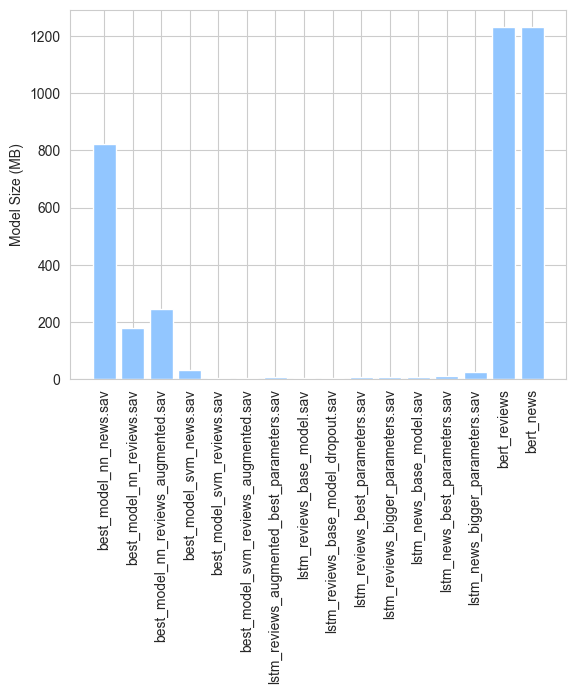

In [420]:
plt.bar(model_sizes.index, model_sizes['size'])
plt.xticks(rotation=90)
plt.ylabel("Model Size (MB)")
plt.show